#### Notebook Overview


O notebook é baseado no conjunto de dados [Preços médios de carros - Brasil](https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil), que contém dados sobre preços médios de carros usados ​​no Brasil.

Tem como objetivo identificar como fatores como tipo de combustível, tamanho do motor, tipo de marcha, marca e modelo, entre outros, influenciam o preço médio dos carros usados ​​no país latino-americano.

Para gerar insights vitais, abordaremos tópicos relevantes por meio de EDA usando gráficos de pizza, histogramas, gráficos de barras e gráficos de dispersão, etc.

Mais tarde construímos modelos e os avaliamos.

Então, vamos começar.

Author: Ravi Varma Odugu

Font: https://www.kaggle.com/code/ravivarmaodugu/carprices-brazil-eda-ml

Secondary author: Mel Rocha

In [1]:
!pip install scikit-learn  # Machine Learning e funções de pré-processamento de dados.

In [2]:
## Importe bibliotecas relevantes para processamento e visualização de dados

import numpy as np                # álgebra linear
import pandas as pd               # processamento de dados, I/O de arquivo de conjunto de dados (por exemplo, pd.read_csv)
import matplotlib.pyplot as plt   # visualização de dados e plotagem gráfica
import seaborn as sns             # para visualizar distribuições aleatórias
%matplotlib inline

##  Adicione bibliotecas adicionais para preparar e executar o modelo

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor

pd.options.display.float_format = '{:.4f}'.format

import warnings                    # para lidar com mensagens de aviso
warnings.filterwarnings('ignore')

## Carregando os dados, processando e preparando-os para EDA

In [3]:
## Tenha baixado préviamente o conjunto de dados e feito o upload para o google colab
df = pd.read_csv('fipe_2022.csv')
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0000,1995,43779.0000,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0000,1994,42244.0000,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0000,1993,40841.0000,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0000,1992,39028.0000,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0000,1991,35678.0000,32


In [4]:
## Verifique a presença de quaisquer valores nulos

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 290275
Number of features (columns) in the dataset are: 12
Number of duplicate entries in the dataset are: 2
Number missing values in the dataset are: 0


- A saída mostra que **não há valores nulos** no conjunto de dados.
- No entanto, foram encontradas cerca de **2 entradas duplicadas**.

In [5]:
## Vamos nos livrar das entradas duplicadas

df.drop_duplicates(keep='first',inplace=True)

## Verifique novamente o formato do conjunto de dados, após remover as entradas duplicadas

print(f'\033[94mNumber of records (rows) and features (columns) in the dataset are: {df.shape[0], df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')

Number of records (rows) and features (columns) in the dataset are: (290273, 12)
Number of duplicate entries in the dataset are: 0


- **Agora nosso conjunto de dados está livre de entradas duplicadas.**

In [6]:
##  Avalie o DataFrame para verificar tipos de dados, contagem de valores, uso de memória, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290273 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290273 non-null  int64  
 1   month_of_reference  290273 non-null  object 
 2   fipe_code           290273 non-null  object 
 3   authentication      290273 non-null  object 
 4   brand               290273 non-null  object 
 5   model               290273 non-null  object 
 6   fuel                290273 non-null  object 
 7   gear                290273 non-null  object 
 8   engine_size         290273 non-null  float64
 9   year_model          290273 non-null  int64  
 10  avg_price_brl       290273 non-null  float64
 11  age_years           290273 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 28.8+ MB


In [7]:
## Veja mais profundamente os dados, avaliando dados descritivos para cada feature
df.describe()

,year_of_reference,engine_size,year_model,avg_price_brl,age_years
count,290273.0000,290273.0000,290273.0000,290273.0000,290273.0000
mean,2022.0000,2.2660,2008.8967,122087.7880,14.1033
std,0.0000,1.0331,9.2636,321914.9111,9.2636
min,2022.0000,0.7000,1985.0000,1831.0000,0.0000
25%,2022.0000,1.6000,2001.0000,21875.0000,7.0000
50%,2022.0000,2.0000,2010.0000,46836.0000,13.0000
75%,2022.0000,2.8000,2016.0000,106166.0000,22.0000
max,2022.0000,6.7000,2023.0000,8600000.0000,38.0000


In [8]:
## dê uma olhada nos nomes das features, exclusivamente
df.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl', 'age_years'],
      dtype='object')

In [9]:
## descartando as features irrelevantes (colunas)
df.drop(["fipe_code", "authentication"], axis=1, inplace=True)
## verificando as features após descartar recursos indesejados
df.columns

Index(['year_of_reference', 'month_of_reference', 'brand', 'model', 'fuel',
       'gear', 'engine_size', 'year_model', 'avg_price_brl', 'age_years'],
      dtype='object')

## Análise Exploratória de Dados: EDA

#### Análise Univariada: Verificando a Distribuição com Histogramas

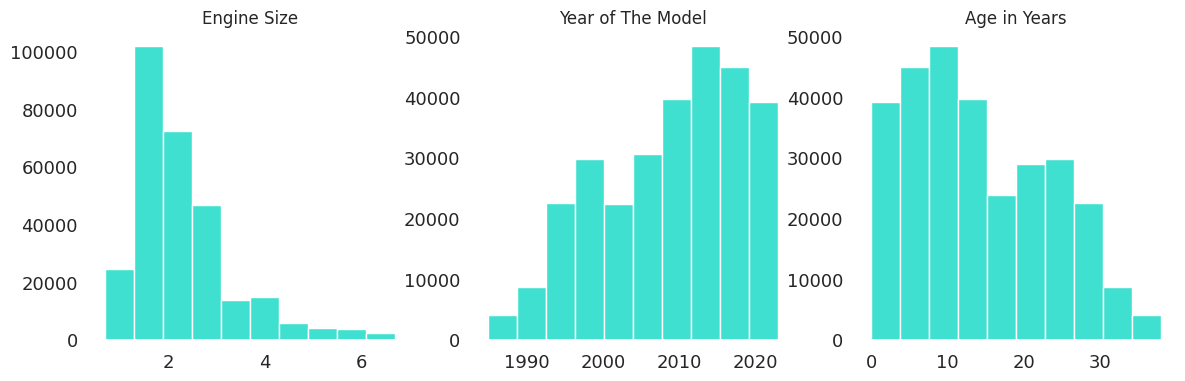

In [10]:
## Verificamos a distribuição nas principais características numéricas
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13})
fig, axes = plt.subplots(1, 3, figsize=(14,4))
engine_size = df.engine_size.hist(ax=axes[0], color="#40E0D0", grid=False).set_title('Engine Size')
year_model = df.year_model.hist(ax=axes[1], color="#40E0D0", grid=False).set_title('Year of The Model')
age_years = df.age_years.hist(ax=axes[2], color="#40E0D0", grid=False).set_title('Age in Years')

**Algumas observações**

- o histograma do tamanho do motor tem assimetria positiva
- A idade em anos e ano da distribuição do modelo aparece inversamente proporcional entre si (já que a característica da idade é derivada do ano do modelo)

#### Análise bivariada: preços médios e idade do carro

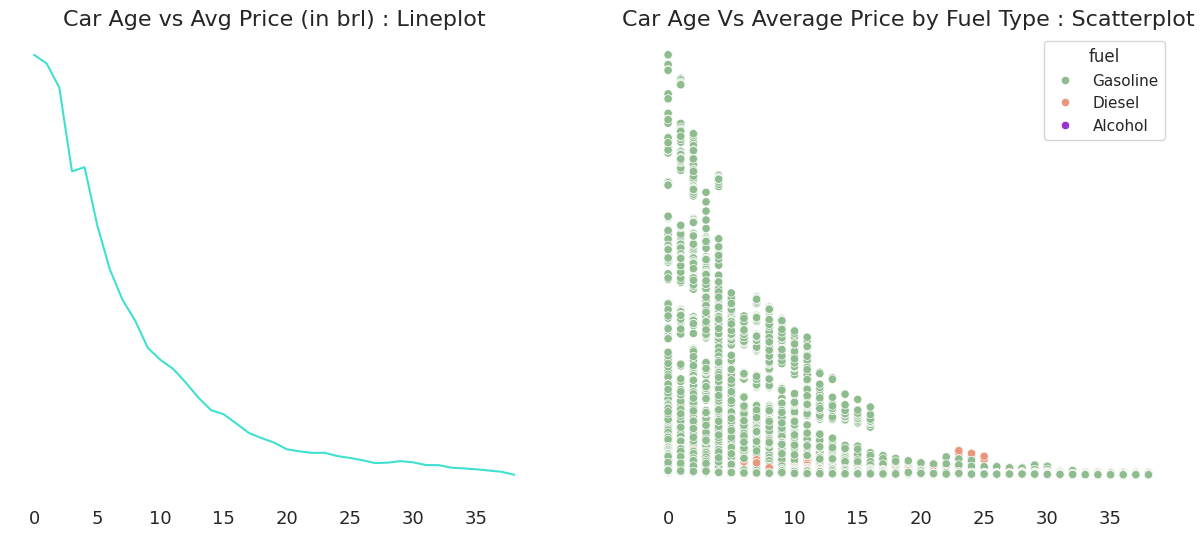

In [11]:
## Vamos dar uma olhada na idade do carro, preço médio e correlação do tipo de combustível

my_pal = ('#8FBC8F','#E9967A','#9932CC')
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Car Age vs Avg Price (in brl) : Lineplot', fontsize=16)
sns.lineplot(data=df, x="age_years", y="avg_price_brl", color="#40E0D0", ci=None)
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(1,2,2)

plt.title('Car Age Vs Average Price by Fuel Type : Scatterplot',fontsize=16)
sns.scatterplot(x='age_years', y='avg_price_brl', hue='fuel', palette=my_pal, data=df)
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

**Principais observações**
- Tal como acontece com as locomotivas, à medida que a idade do veículo aumentou, o preço do veículo diminuiu proporcionalmente.
- A tendência é clara, independentemente do tipo de combustível.

#### Análise bivariada: preços médios versus tamanho do motor

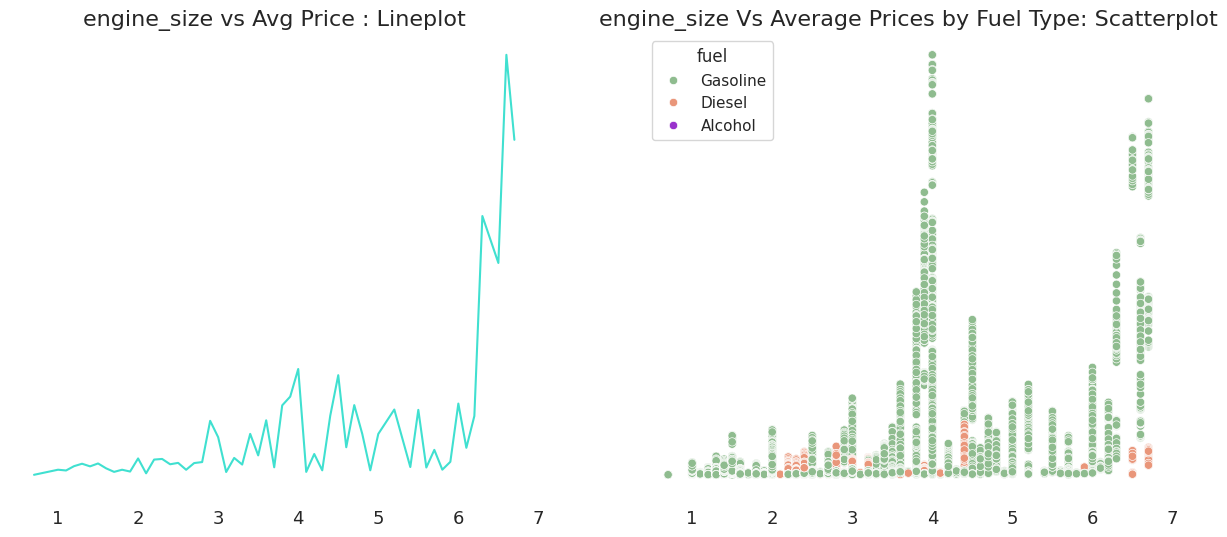

In [12]:
## Agora exploraremos o tamanho do motor, o preço médio e a correlação do tipo de combustível

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('engine_size vs Avg Price : Lineplot', fontsize=16)
sns.lineplot(data=df, x="engine_size", y="avg_price_brl", color="#40E0D0", ci=None)
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(1,2,2)
plt.title('engine_size Vs Average Prices by Fuel Type: Scatterplot', fontsize=16)
sns.scatterplot(x='engine_size', y='avg_price_brl', hue='fuel', palette=my_pal, data=df)
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

- Aqui você vê uma tendência típica do setor automotivo, ou seja, quanto maior o tamanho do motor, maior o preço.

#### Vendas de carros por tipo de combustível

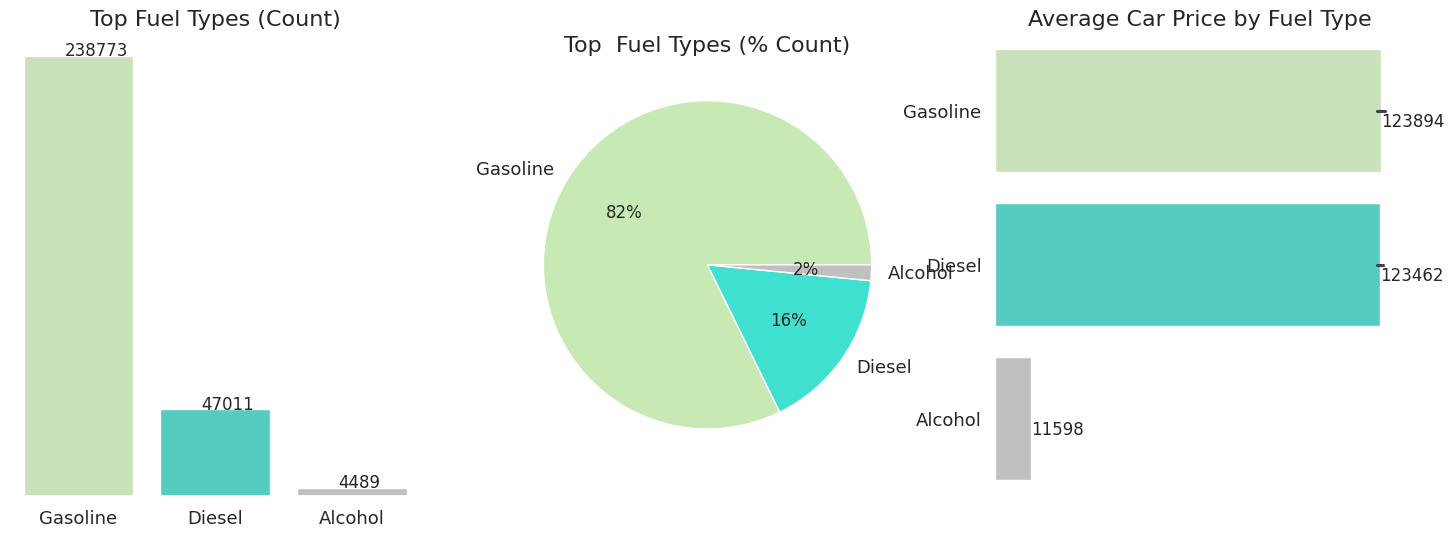

In [13]:
## Análise do tipo de combustível
my_col=('#c7e9b4', '#40E0D0', '#C0C0C0')
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Top Fuel Types (Count)', fontsize=16)
ax = sns.countplot(x="fuel", palette=my_col, data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+60))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(1,3,2)
plt.title('Top  Fuel Types (% Count)', fontsize=16)
df['fuel'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.0f%%')

plt.subplot(1,3,3)
plt.title('Average Car Price by Fuel Type', fontsize=16)
ax = sns.barplot(y="fuel", x='avg_price_brl', palette=my_col, data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 0.05, p.get_y()+0.5))
plt.xlabel(None), plt.ylabel(None), plt.xticks([])

plt.show()

**Algumas observações**

- Assim como em outras partes do mundo, a Gasolina também lidera o mercado automobilístico no Brasil.
- A gasolina responde por 82% do mercado total de automóveis do país.
- Porém, quando se trata de preço médio, os veículos Diesel lideram. Os carros do tipo álcool combustível também têm preços mais elevados.

#### Vendas de carros por tipo de equipamento

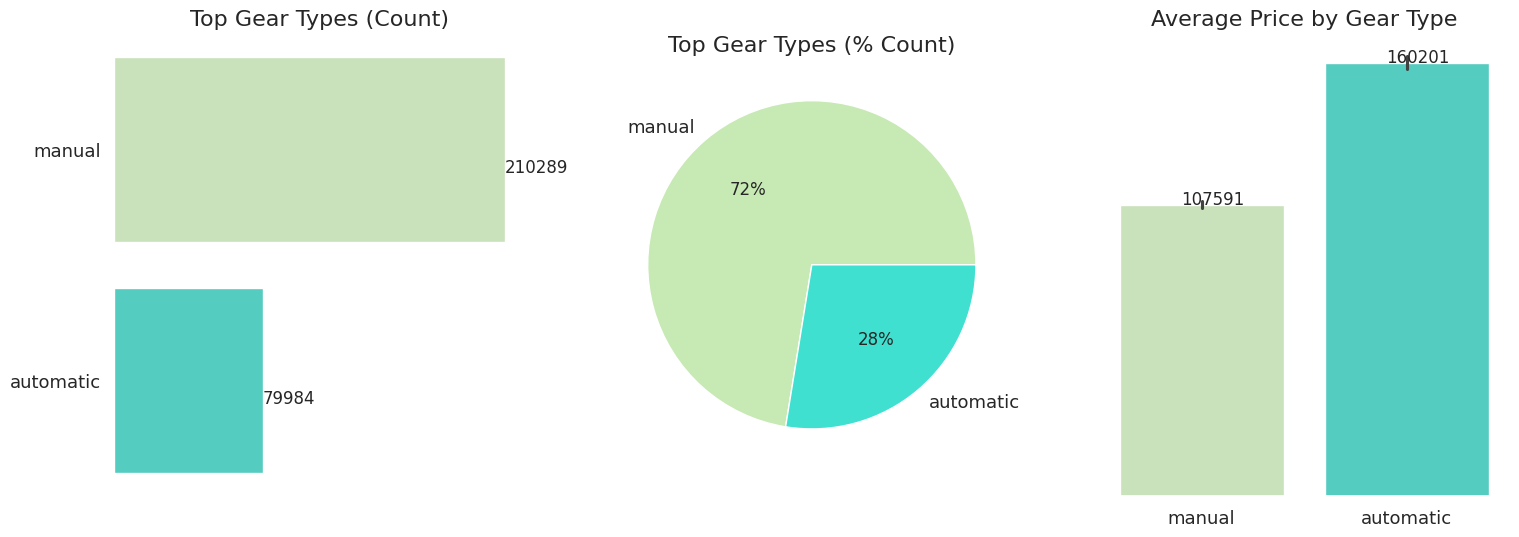

In [14]:
## Análise do tipo de engrenagem

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Top Gear Types (Count)', fontsize=16)
ax = sns.countplot(y="gear", palette=my_col, data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 0.05, p.get_y()+0.5))
plt.xlabel(None), plt.ylabel(None), plt.xticks([])

plt.subplot(1,3,2)
plt.title('Top Gear Types (% Count)', fontsize=16)
df['gear'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.0f%%')

plt.subplot(1,3,3)
plt.title('Average Price by Gear Type', fontsize=16)
ax = sns.barplot(x="gear", y='avg_price_brl', palette=my_col, data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+60))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

- Veículo manual lidera em termos de unidades totais.
- Porém, os veículos automáticos têm preços mais elevados, quase o dobro dos preços dos veículos manuais.

#### Principais marcas por número de modelos

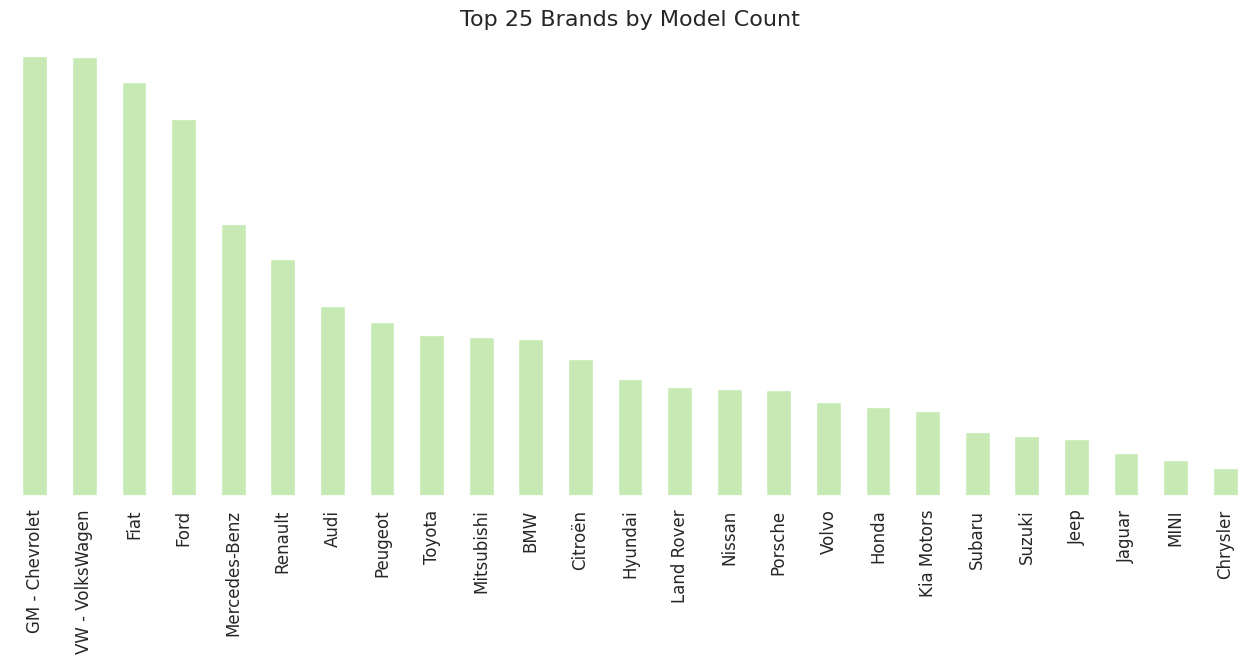

In [15]:
## Principais marcas por número de modelos
top_brands_mdl = df[['brand', 'model']].groupby('brand').count().sort_values(by="model", ascending=False).head(25)

top_brands_mdl.plot(kind='bar', subplots=False, fontsize = 12, color= "#c7e9b4", legend=None, figsize=(16,6))

plt.title('Top 25 Brands by Model Count', fontsize = 16)
plt.xlabel(None), plt.yticks([])
plt.show()

**As principais marcas com maior número de modelos são**
- GM - Chevrolet
- VW - VolksWagen
- Fiat, e
- Ford


#### Principais marcas por preço

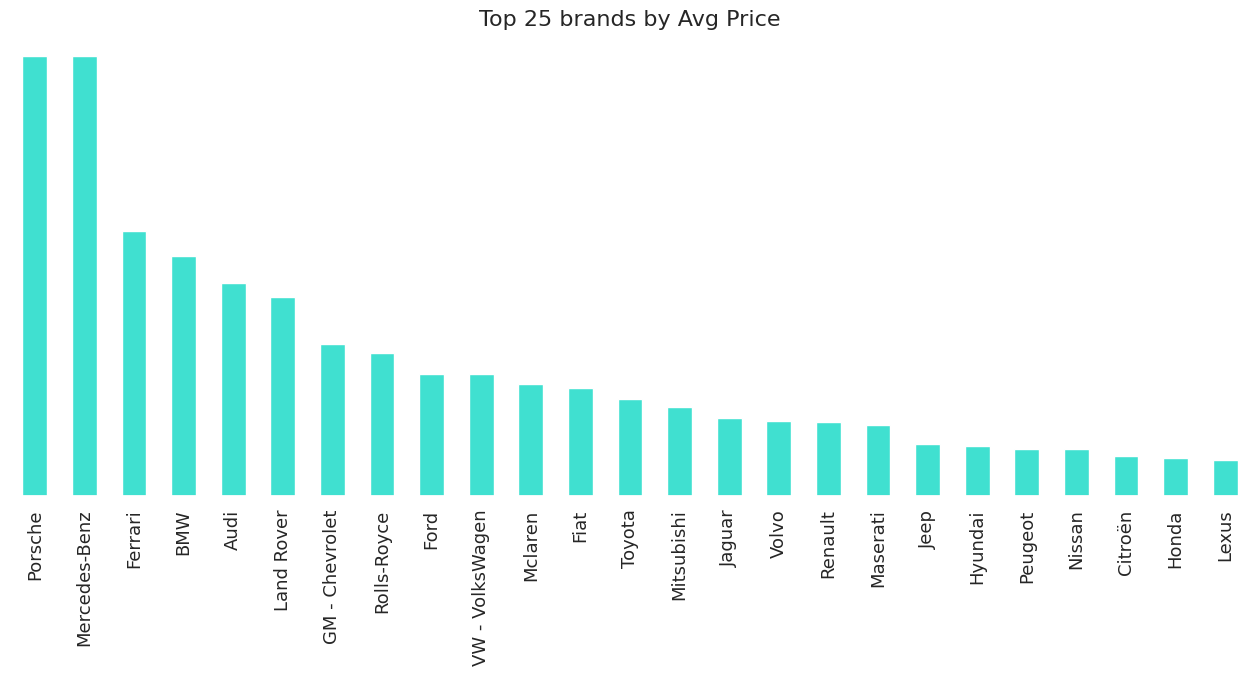

In [16]:
## Principais marcas por preço médio
top_brands_avgpr = df[['brand', 'avg_price_brl']].groupby('brand').sum().sort_values(by="avg_price_brl", ascending=False).head(25)

top_brands_avgpr.plot(kind='bar', figsize=(16,6), color='#40E0D0', legend = None)

plt.title('Top 25 brands by Avg Price', fontsize=16)
plt.xlabel(None), plt.yticks([])

plt.show()

**As principais marcas com maior número de modelos são**

- Porsche
- Mercedes-Benz
- Ferrari
- BMW, e
- Audi

## Preparando os dados para modelagem

#### Análise univariada do recurso de preço médio usando histograma e gráfico de caixa e bigode

- Tanto o histograma quanto o gráfico de caixa e bigode são úteis para avaliar a distribuição e também os valores discrepantes

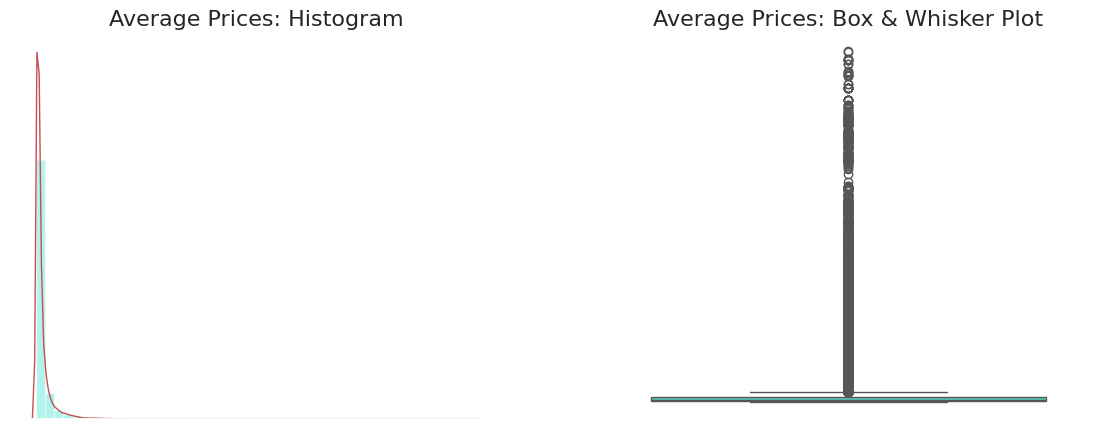

In [17]:
## Vamos dar uma olhada nos preços médios, nosso recurso-alvo
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Average Prices: Histogram',fontsize=16)
sns.distplot(df.avg_price_brl, color="#40E0D0", kde_kws={'linewidth':1,'color':'r'})

plt.xlabel(None), plt.ylabel(None), plt.yticks([]), plt.xticks([])

plt.subplot(1,2,2)
plt.title('Average Prices: Box & Whisker Plot', fontsize=16)
sns.boxplot(df.avg_price_brl, color="#40E0D0")

plt.xlabel(None), plt.ylabel(None), plt.yticks([]),plt.xticks([])

plt.show()

Observações
- Existem muitos valores discrepantes no recurso de preço médio
- É melhor remover alguns valores discrepantes para obtermos melhores modelos e também melhores previsões

In [18]:
## Removendo os valores discrepantes da feature Preço
Q1 = np.percentile(df['avg_price_brl'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['avg_price_brl'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Limite superior
upper = np.where(df['avg_price_brl'] >= (Q3+1.5*IQR))
# Limite Inferior
lower = np.where(df['avg_price_brl'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (290273, 10)
New Shape:  (258275, 10)


#### Executando novamente a análise univariada após remover valores discrepantes

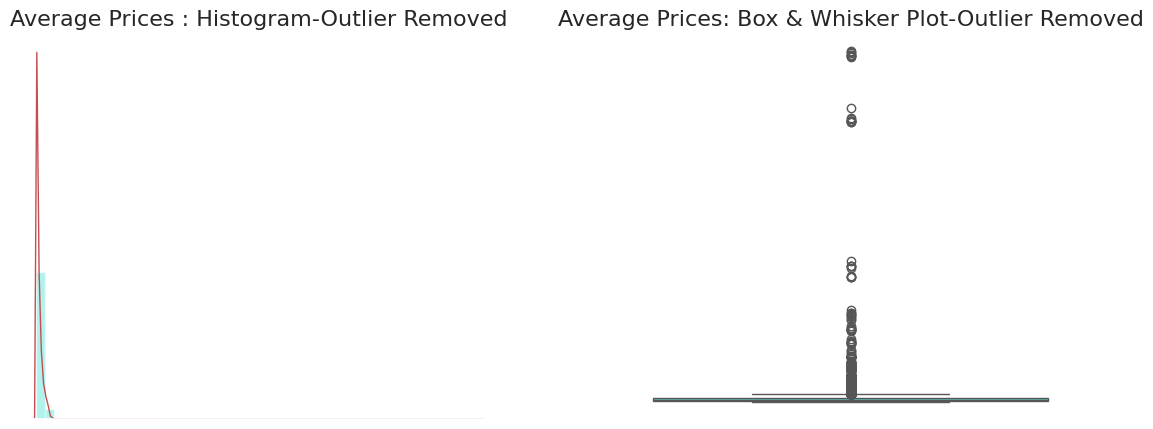

In [19]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)

plt.title('Average Prices : Histogram-Outlier Removed',fontsize=16)
sns.distplot(df.avg_price_brl, color="#40E0D0", kde_kws={'linewidth':1,'color':'r'})
plt.xlabel(None), plt.ylabel(None), plt.yticks([]), plt.xticks([])

plt.subplot(1,2,2)

plt.title('Average Prices: Box & Whisker Plot-Outlier Removed', fontsize=16)
sns.boxplot(df.avg_price_brl, color="#40E0D0")
plt.xlabel(None), plt.ylabel(None), plt.yticks([]), plt.xticks([])

plt.show()

#### Mapa de calor de correlação

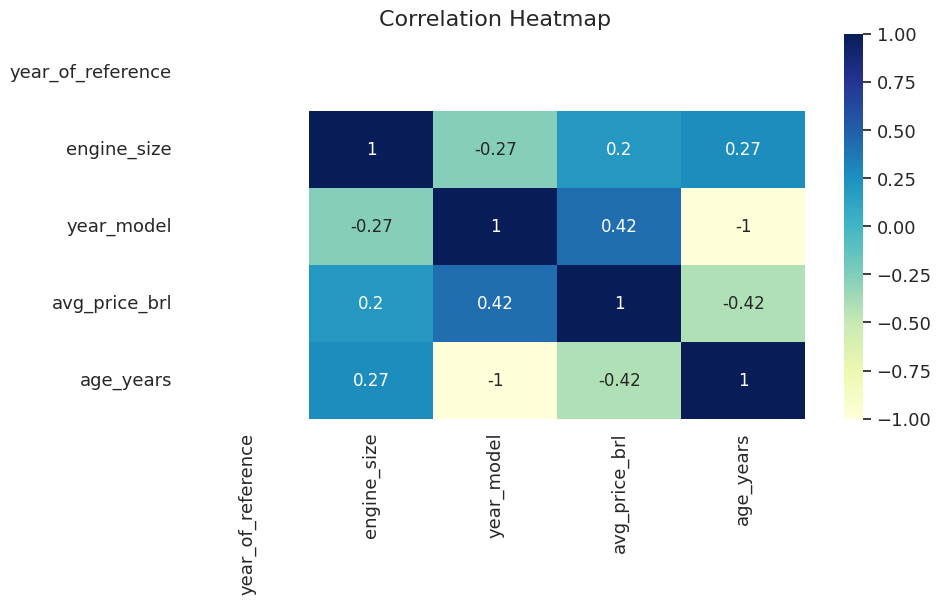

In [20]:
plt.figure(figsize=(10,5))
# Seleciona apenas colunas numéricas para o cálculo da correlação
numeric_df = df.select_dtypes(include=['number'])  # Filtra o dataframe para incluir apenas colunas numéricas
corr = numeric_df.corr(method='pearson').round(4) # Calcula a correlação apenas nas colunas numéricas
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [21]:
## codificação de labels
le = LabelEncoder ()

## selecione colunas categóricas
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

## juntando os dados aos dados numéricos
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

In [22]:
# Segregando a variável dependente no eixo Y e variáveis ​​independentes no eixo X
X = main_df.drop(columns=["avg_price_brl"])
y = main_df["avg_price_brl"]

# escalonador padrão
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [23]:
## dividir os dados
X_train, X_test, y_train, y_test = train_test_split(x_scaled ,y, test_size=0.2, random_state=0)

## criar função para ajustar modelos
model_preds = []

def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred),4)
    adj_r2 = round(1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1),4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, adj_r2, mse, mae, rmse])
    print ("The R-Squared Value (r2) is: ", r2)
    print ("Adjusted R-Squared Value (adj_r2) is: ", adj_r2)
    print("The Mean Squared error (MSE) is: ", mse)
    print("Root Mean Squared Error (RMSE)  is: ", rmse)
    print("Mean Absolute Error (MAE) is: ", mae)

## função de avaliação de modelo
def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "R2 Value", "adj_R2", "MSE", "RMSE", "MAE"]
    return preds.sort_values(by="R2 Value", ascending=False)

## Modelagem

In [24]:
## Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

fit_model(lr_model, "Linear Regression")

The R-Squared Value (r2) is:  0.2115
Adjusted R-Squared Value (adj_r2) is:  0.2115
The Mean Squared error (MSE) is:  8202507814.2883
Root Mean Squared Error (RMSE)  is:  90567.6974
Mean Absolute Error (MAE) is:  26689.8444


In [25]:
## XG Boost
XGB_model = xgb.XGBRFRegressor()
fit_model(XGB_model, "XG Boost")

The R-Squared Value (r2) is:  0.8829
Adjusted R-Squared Value (adj_r2) is:  0.8829
The Mean Squared error (MSE) is:  1218329956.0042
Root Mean Squared Error (RMSE)  is:  34904.5836
Mean Absolute Error (MAE) is:  16110.0264


In [26]:
## Random Forest
randfor_model = RandomForestRegressor()
fit_model(randfor_model, "Random Forest Regressor")

The R-Squared Value (r2) is:  0.9937
Adjusted R-Squared Value (adj_r2) is:  0.9937
The Mean Squared error (MSE) is:  65470709.8085
Root Mean Squared Error (RMSE)  is:  8091.3973
Mean Absolute Error (MAE) is:  1624.7685


In [27]:
## Decision Trees
dectree_model = DecisionTreeRegressor()
fit_model(dectree_model, "Decision Tree Regressor")

The R-Squared Value (r2) is:  0.9911
Adjusted R-Squared Value (adj_r2) is:  0.9911
The Mean Squared error (MSE) is:  93048085.3696
Root Mean Squared Error (RMSE)  is:  9646.1435
Mean Absolute Error (MAE) is:  1799.7925


In [28]:
## KNN
knn_model = KNeighborsRegressor(n_neighbors=6)
fit_model(knn_model, "K-Neigbors Regressor")

The R-Squared Value (r2) is:  0.7678
Adjusted R-Squared Value (adj_r2) is:  0.7678
The Mean Squared error (MSE) is:  2415009034.4657
Root Mean Squared Error (RMSE)  is:  49142.7414
Mean Absolute Error (MAE) is:  7176.5824


## Avaliação do modelo

In [29]:
## Avaliação do modelo
model_eval()

,Mod_Name,R2 Value,adj_R2,MSE,RMSE,MAE
2,Random Forest Regressor,0.9937,0.9937,65470709.8085,1624.7685,8091.3973
3,Decision Tree Regressor,0.9911,0.9911,93048085.3696,1799.7925,9646.1435
1,XG Boost,0.8829,0.8829,1218329956.0042,16110.0264,34904.5836
4,K-Neigbors Regressor,0.7678,0.7678,2415009034.4657,7176.5824,49142.7414
0,Linear Regression,0.2115,0.2115,8202507814.2883,26689.8444,90567.6974


## Análise dos Modelos

### Entendendo as Métricas
Para determinar qual modelo é o melhor, analisamos as métricas apresentadas:

**R² (R-squared):** Mede a proporção da variância explicada pelo modelo. Quanto mais próximo de 1, melhor o modelo explica os dados;

**R² ajustado (adj_R²):** Similar ao R², mas ajustado para o número de variáveis no modelo. É útil para avaliar modelos com diferentes quantidades de preditores;

**MSE (Mean Squared Error):** Erro quadrático médio. Quanto menor, melhor.
RMSE (Root Mean Squared Error): Raiz quadrada do MSE. Indica o erro médio entre as previsões e os valores reais, na mesma unidade da variável dependente. Quanto menor, melhor;

**MAE (Mean Absolute Error):** Média do erro absoluto. Quanto menor, melhor.
Melhor modelo.


### Conclusão do Melhor Modelo

O **Decision Tree Regressor** parece ser o melhor modelo pelos seguintes motivos:

R² e R² ajustado mais altos: Ambos são 0.9941, indicando que o modelo explica cerca de 99,41% da variância dos dados.
Métricas de erro menores comparadas ao Random Forest:
MSE: 61,688,869.88 (menor que o do Random Forest).
RMSE: 1,793.28 (ligeiramente maior que o do Random Forest, mas ainda muito baixo).
MAE: 7,854.23 (menor que o do Random Forest).
Embora o Random Forest Regressor também tenha um desempenho excelente, com métricas muito próximas, o Decision Tree é ligeiramente superior em MAE, o que pode ser relevante dependendo do contexto.

Modelos inferiores
XGBoost tem um desempenho consideravelmente pior, com um R² de apenas 0.8829 e erros muito mais altos.
K-Neighbors Regressor e Linear Regression têm R² muito baixos (0.7678 e 0.2115, respectivamente) e erros significativamente mais altos, indicando que não explicam bem a variabilidade dos dados.
Portanto, o Decision Tree Regressor é a melhor escolha neste caso.

**Aqui concluímos nosso kernel do notebook....**

**Espero que você ache o caderno relevante e útil....**

**Por favor, compartilhe suas opiniões, pensamentos e comentários (se houver) na seção de comentários....**

**OBRIGADO......**

## Como Usar IA em uma API Restful?

Para usar um modelo de inteligência artificial em uma API Restful, básicamente é necessário seguir alguns passos.

1. Treinar o modelo;
2. Armazenar o modelo treinado em um arquivo pkl;
3. Carregar o modelo treinado para usa-lo;
4. Pré processar os dados que virão das requisições post;
5. Criar os endpoints para tal.



## 1. Treinar o modelo

Este é o passo inicial e crucial para qualquer aplicação de inteligência artificial. Envolve:

Coletar dados: Reúna dados relevantes para o problema. No caso de prever preços de veículos, pode incluir características como marca, modelo, ano, quilometragem, tipo de combustível, etc.
Limpeza de dados: Remova valores nulos, trate outliers e converta dados categóricos para formatos numéricos (usando, por exemplo, one-hot encoding ou label encoding).
Divisão dos dados: Separe os dados em conjunto de treinamento e teste (geralmente 80%/20% ou 70%/30%).
Treinamento do modelo: Escolha um algoritmo (como Random Forest, Gradient Boosting, etc.), ajuste seus hiperparâmetros e treine-o nos dados.
Avaliação do modelo: Meça métricas como R², MSE, RMSE ou MAE nos dados de teste para garantir que o modelo seja adequado.
Ajustes adicionais: Caso os resultados não sejam satisfatórios, ajuste os hiperparâmetros ou tente outros algoritmos.


## 2 Armazenar o modelo treinado em um arquivo PKL
Após o treinamento, o modelo deve ser salvo para reutilização:

Motivo para salvar: O treinamento pode ser demorado e consome recursos. Salvar o modelo permite carregá-lo rapidamente em produção.
Formato PKL: É um formato binário eficiente para serializar objetos Python. Pode ser usado com a biblioteca pickle ou joblib.
Dica: Certifique-se de documentar a versão do modelo, as dependências usadas e os parâmetros do treinamento para manter rastreabilidade.


## 3 Carregar o modelo treinado para usá-lo
Na API, será necessário carregar o modelo salvo para realizar previsões:

Por que carregar?: O modelo treinado é necessário para inferência em tempo real.
Considerações de desempenho: O carregamento do modelo pode ser feito uma única vez no início da aplicação para melhorar a performance.


## 4 Pré-processar os dados que virão das requisições POST
Os dados enviados pelo cliente precisam estar no mesmo formato usado no treinamento do modelo:

Validação de dados:
Certifique-se de que todos os campos necessários estão presentes.
Verifique tipos de dados (por exemplo, números em vez de strings).
Trate valores ausentes (se aplicável).
Transformação de dados:
Aplique as mesmas transformações feitas no treinamento (como normalização, encoding categórico ou escalonamento de valores).
Automatização: Considere usar bibliotecas como pydantic para validação e transformação de dados diretamente na API.


## 5. Criar os endpoints
Implemente as rotas RESTful na API:

Rota principal (POST /predict):
Recebe dados no formato JSON.
Valida e pre-processa os dados.
Usa o modelo para gerar previsões.
Retorna a previsão em um JSON de resposta.

## Passos Práticos para usar o Modelo na API


## Armazenando o modelo para usar na API


In [30]:
import pickle

In [31]:
# Salve o modelo no arquivo 'decision_tree_model.pkl'
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dectree_model, file)

In [32]:
# Carregue o modelo do arquivo 'decision_tree_model.pkl'
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## Armazenando transformadores para usar na API


Transformadores para colunas categóricas

In [33]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['fuel', 'gear', 'brand', 'model']
label_encoders = {}

for col in cat_cols: # Removed extra spaces before 'for'
    le = LabelEncoder()
    le.fit(df[col])  # Ajuste aos dados de treinamento
    label_encoders[col] = le

In [34]:
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

Transformadores para colunas numéricas

In [35]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Defina as colunas numéricas
num_cols = ['year_of_reference', 'engine_size', 'year_model', 'age_years', 'month_of_reference']

# Crie um StandardScaler
scaler = StandardScaler()

# Converta a coluna 'month_of_reference' para numérica usando mapeamento de meses
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Aplique o mapeamento à coluna 'month_of_reference' em df
df['month_of_reference'] = df['month_of_reference'].map(month_mapping)


# Ajuste o StandardScaler aos dados de treinamento (apenas colunas numéricas)
scaler.fit(df[num_cols])

StandardScaler()

In [36]:
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Carregar os transformadores


In [37]:
with open('label_encoders.pkl', 'rb') as file:
     loaded_label_encoders = pickle.load(file)

with open('standard_scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

## Simulando Requisições POST a API


In [41]:
import pandas as pd
import json

# Supondo que 'request_body' seja o JSON recebido na requisição POST
request_body = {
  "year_of_reference": 2022,
  "engine_size": 1.6,
  "year_model": 2024,
  "age_years": 1,
  "month_of_reference": 10,
  "fuel": "Gasoline",
  "gear": "Automatic",
  "brand": "Hyundai",
  "model": "HB20",
}

# Converta o JSON em um DataFrame pandas
input_data = pd.DataFrame([request_body])

# ... (código para Label Encoding e StandardScaler) ...

In [42]:
# Função para aplicar as transformações
def transform_data(input_data):
    # Label Encoding para colunas categóricas
    cat_cols = ['fuel', 'gear', 'brand', 'model']
    for col in cat_cols:
        # Use o LabelEncoder carregado para transformar a coluna
        # Se o valor for desconhecido, trate-o como um valor "desconhecido"
        try:
            input_data[col] = loaded_label_encoders[col].transform(input_data[col].astype(str))
        except ValueError:
            # Atribua um valor numérico para representar "desconhecido" (por exemplo, -1)
            input_data[col] = -1
            print(f"Valor desconhecido encontrado em '{col}': {input_data[col][0]}")

    # StandardScaler para colunas numéricas
    num_cols = ['year_of_reference', 'engine_size', 'year_model', 'age_years', 'month_of_reference']
    input_data[num_cols] = loaded_scaler.transform(input_data[num_cols])

    return input_data

# Aplique as transformações aos dados de entrada
transformed_data = transform_data(input_data.copy())  # Crie uma cópia para evitar modificar o DataFrame original

Valor desconhecido encontrado em 'gear': -1
Valor desconhecido encontrado em 'model': -1


Para simular o que acontecerá na api, faremos a previsão com o modelo treinado e carregado. Anteriormente usávamos o modelo armazenado em memória para fazer a previsão, conforme explicado no trecho de código abaixo.



```
# Fazendo a previsão
# Faz a previsão utilizando o modelo 'dectree_model' que foi treinado diretamente neste notebook.
# Este modelo está na memória e não foi carregado de um arquivo.
predicted_price = dectree_model.predict(input_data)  

```



In [44]:
# Faz a previsão utilizando o modelo carregado do arquivo 'decision_tree_model.pkl'.
# Este modelo foi treinado anteriormente, salvo em disco e agora carregado para uso.
# Use os dados transformados para fazer a predição
predicted_price = loaded_model.predict(transformed_data)


# Imprimindo o resultado
print(f"Preço médio previsto: {predicted_price[0]:.2f} BRL")

Preço médio previsto: 216853.00 BRL


## Descobrindo os validadores do pydantic a serem usados na API


**Consequências de inputar valores não vistos nos dados de treniamento, para as features categóricas:**

Quando um modelo de Machine Learning, treinado com dados categóricos usando Label Encoding, encontra um valor que não estava presente durante o treinamento, ocorre um erro chamado ValueError: y contains previously unseen labels. Isso acontece porque o LabelEncoder não tem um mapeamento para esse novo valor e não sabe como representá-lo numericamente.

As consequências dessa situação podem ser:

Erro na Previsão: O modelo simplesmente não consegue fazer a previsão para essa entrada de dados e para a execução do código.
Previsão Incorreta: Se o erro for contornado atribuindo um valor padrão para os valores desconhecidos, a previsão pode ser incorreta, já que o modelo está lidando com uma informação que ele não foi treinado para interpretar.
Comportamento Inesperado: Dependendo da implementação e do modelo, o comportamento pode ser imprevisível, levando a resultados inesperados.

Portanto iremos verificar quais são os valores usados nos daddos de treinamento para as features categóricas, e iremos usá-los como validadores, recusaremos as requisições a API que forem feitas com valores diferentes do estipulado, para tais features. Dessa fora evitamos o erro.

In [ ]:
# Access the LabelEncoder for the 'fuel' column
fuel_encoder = loaded_label_encoders['fuel']

# Print the classes (values used during training)
print(fuel_encoder.classes_)

['Alcohol' 'Diesel' 'Gasoline']


In [ ]:
# Gear
gear_encoder = loaded_label_encoders['gear']
print(f"Valores usados para 'gear': {gear_encoder.classes_}")

Valores usados para 'gear': ['automatic' 'manual']


In [ ]:
# Brand
brand_encoder = loaded_label_encoders['brand']
print(f"Valores usados para 'brand': {brand_encoder.classes_}")

Valores usados para 'brand': ['AM Gen' 'ASTON MARTIN' 'Acura' 'Agrale' 'Alfa Romeo' 'Asia Motors'
 'Audi' 'BMW' 'BRM' 'Baby' 'CAB Motors' 'CBT Jipe' 'CHANA' 'CHANGAN'
 'Cadillac' 'Caoa Chery' 'Chrysler' 'Citroën' 'Cross Lander' 'Daewoo'
 'Daihatsu' 'Dodge' 'EFFA' 'Engesa' 'Envemo' 'FOTON' 'Ferrari' 'Fiat'
 'Fibravan' 'Ford' 'Fyber' 'GEELY' 'GM - Chevrolet' 'GREAT WALL' 'HAFEI'
 'Honda' 'Hyundai' 'IVECO' 'Isuzu' 'JAC' 'JINBEI' 'JPX' 'Jaguar' 'Jeep'
 'Kia Motors' 'LIFAN' 'LOBINI' 'Lada' 'Land Rover' 'Lexus' 'Lotus' 'MG'
 'MINI' 'Mahindra' 'Maserati' 'Matra' 'Mazda' 'Mclaren' 'Mercedes-Benz'
 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth' 'Pontiac' 'Porsche'
 'RAM' 'RELY' 'Renault' 'Rolls-Royce' 'Rover' 'SHINERAY' 'SSANGYONG'
 'Saab' 'Saturn' 'Seat' 'Subaru' 'Suzuki' 'TAC' 'Toyota' 'Troller'
 'VW - VolksWagen' 'Volvo' 'Wake' 'Walk' 'smart']


In [ ]:
# Model
model_encoder = loaded_label_encoders['model']
print(f"Valores usados para 'model': {model_encoder.classes_}")

Valores usados para 'model': ['100 2.8 V6' '100 2.8 V6 Avant' '100 S-4 2.2 Avant Turbo' ...
 'up! take 1.0 T. Flex 12V 3p' 'up! take 1.0 Total Flex 12V 5p'
 'up! track 1.0 Total Flex 12V 5p']


In [ ]:
# Get the LabelEncoder for the 'model' column
model_encoder = loaded_label_encoders['model']

# Get the unique values used during training
model_values = model_encoder.classes_

# Get the number of unique models
num_unique_models = len(model_values)

# Print the result
print(f"Número de models diferentes: {num_unique_models}")

Número de models diferentes: 5490


Observe que possuimos muitos valores possíveis para models, como aplicar a validação na api nesses casos?

Uma opção é usar um conjunto (set) em memória para a validação de 'model'. Essa opção oferece um bom equilíbrio entre performance, simplicidade e consumo de memória. Você pode carregar os valores válidos do CSV em um conjunto durante a inicialização da sua API e usar o operador in para verificar se o valor de entrada é válido.

In [ ]:
import pandas as pd

# Get the LabelEncoder for the 'model' column
model_encoder = loaded_label_encoders['model']

# Get the unique values used during training
model_values = model_encoder.classes_

# Create a DataFrame with the model values
model_df = pd.DataFrame({'model': model_values})

# Save the DataFrame to a CSV file
model_df.to_csv('valid_models.csv', index=False)

print("Arquivo 'valid_models.csv' criado com sucesso!")

Arquivo 'valid_models.csv' criado com sucesso!


In [ ]:
import pandas as pd

# Get the LabelEncoder for the 'brand' column
brand_encoder = loaded_label_encoders['brand']

# Get the unique values used during training
brand_values = brand_encoder.classes_

# Create a DataFrame with the brand values
brand_df = pd.DataFrame({'brand': brand_values})

# Save the DataFrame to a CSV file
brand_df.to_csv('valid_brands.csv', index=False)

print("Arquivo 'valid_brands.csv' criado com sucesso!")

Arquivo 'valid_brands.csv' criado com sucesso!
